<a href="https://colab.research.google.com/github/yamannegi/skin_cancer_detection/blob/main/Skin_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random


In [5]:
df=pd.read_csv('/content/hmnist_28_28_RGB.csv')

In [6]:
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


# Step 3: Train Test Split

In [7]:
fractions = np.array([0.8, 0.2])
df = df.sample(frac=1)  # Shuffle the data
train_set, test_set = np.array_split(df, (fractions[:-1].cumsum() * len(df)).astype(int))

In [8]:
print(len(train_set))

8012


In [9]:
print(len(test_set))

2003


In [10]:
df.label.unique()

array([4, 6, 2, 0, 3, 1, 5])

In [11]:
# reference: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000/discussion/183083
classes={
    0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),

    1:('bcc' , 'basal cell carcinoma'),

    2:('bkl', 'benign keratosis-like lesions'),

    3:('df', 'dermatofibroma'),

    4:('nv', ' melanocytic nevi'),

    5:('vasc', ' pyogenic granulomas and hemorrhage'),

    6:('mel', 'melanoma'),
}

In [12]:
y_train=train_set['label']

x_train=train_set.drop(columns=['label'])

y_test=test_set['label']

x_test=test_set.drop(columns=['label'])

columns=list(x_train)

In [13]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cuda:0


# Step 4: Exploratory Data Analysis and Preprocessing

<Axes: ylabel='count'>

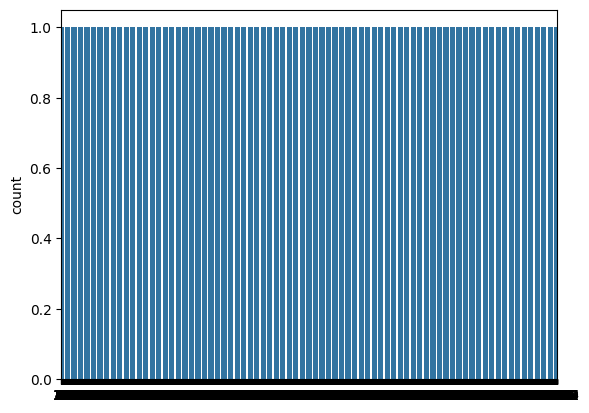

In [15]:

sns.countplot(train_set['label'])

In [16]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler()

x_train,y_train  = oversample.fit_resample(x_train,y_train)

<Axes: ylabel='count'>

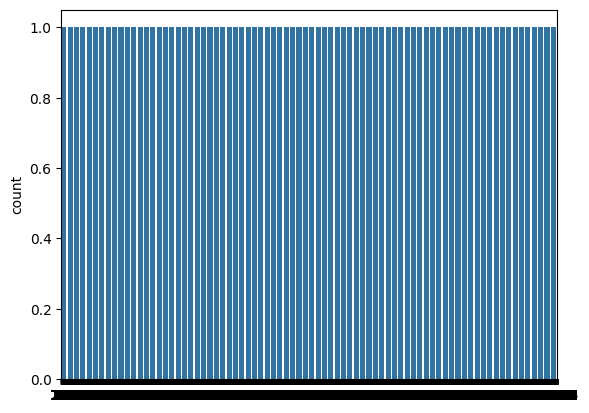

In [17]:
sns.countplot(y_train)

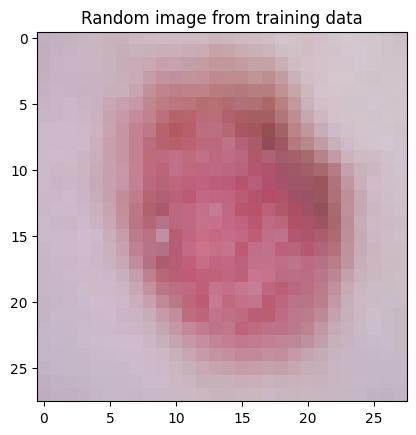

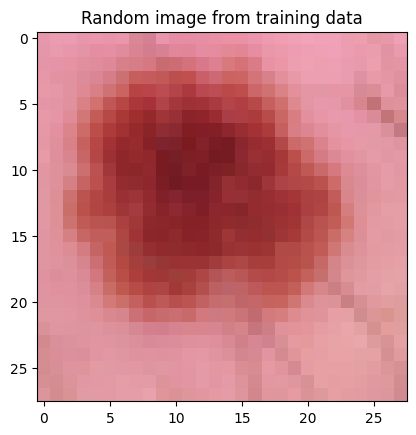

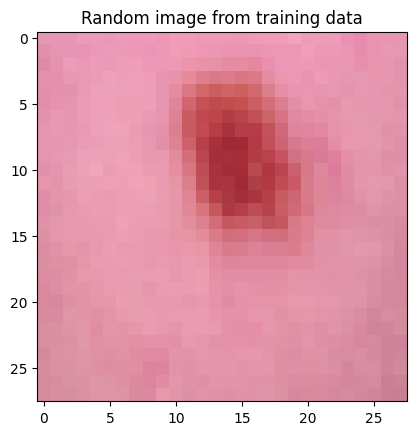

In [18]:

num=random.randint(0,8000)
x_train=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()
num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

# Step 5: Model Building (CNN)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [20]:

%time

model = Sequential()

model.add(Conv2D(16,
                 kernel_size = (3,3),
                 input_shape = (28, 28, 3),
                 activation = 'relu',
                 padding = 'same'))

model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(64,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(256,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 5, 5, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 1, 1, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │              

 Total params: 504,103 (1.92 MB)

 Trainable params: 502,983 (1.92 MB)

 Non-trainable params: 1,120 (4.38 KB)

In [35]:

callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.keras', # Changed the extension to .keras
                                              monitor='val_acc',
                                              mode='max',
                                              verbose=1,
                                              save_best_only=True)

In [38]:

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # Change 'lr' to 'learning_rate'

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [26]:
from datetime import datetime

start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 50,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

Epoch 1/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 27s 62ms/step - accuracy: 0.4468 - loss: 1.5574 - val_accuracy: 0.2750 - val_loss: 2.1145
Epoch 2/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8513 - loss: 0.4613 - val_accuracy: 0.3562 - val_loss: 1.6277
Epoch 3/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8996 - loss: 0.2992 - val_accuracy: 0.5597 - val_loss: 0.9204
Epoch 4/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9337 - loss: 0.1966 - val_accuracy: 0.3965 - val_loss: 1.4900
Epoch 5/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9367 - loss: 0.1836 - val_accuracy: 0.5944 - val_loss: 0.9671
Epoch 6/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9417 - loss: 0.1719 - val_accuracy: 0.5942 - val_loss: 1.0093
Epoch 7/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9476 - loss: 0.1582 - val_accuracy: 0.6887 - val_loss: 0.6459
Epoch 8/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9607 - loss: 0.1147 - val_accuracy:

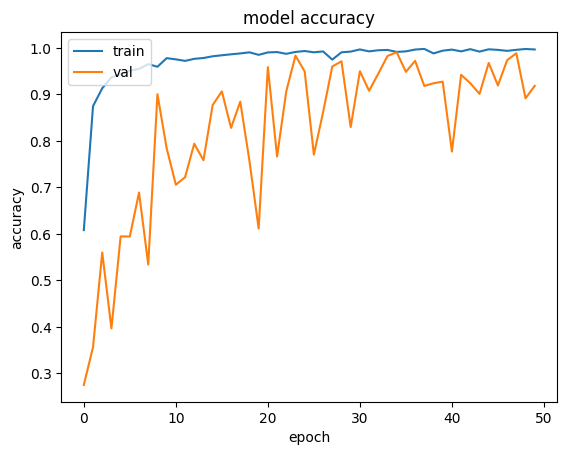

In [28]:
#plot of accuracy vs epoch

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

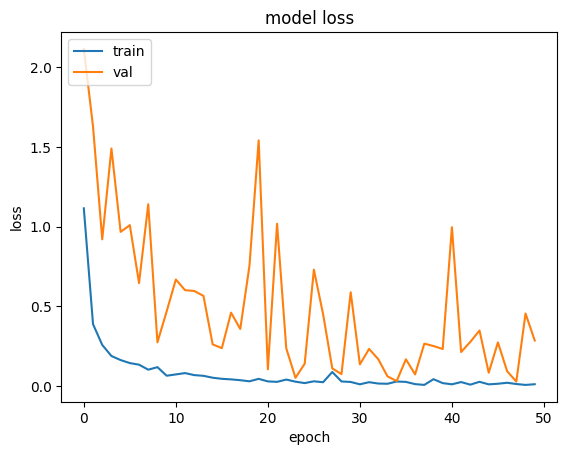

In [29]:
#plot of loss vs epoch

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [37]:
x_test=np.array(x_test).reshape(-1,28,28,3)

loss, acc = model.evaluate(x_test, y_test, verbose=2)

63/63 - 2s - 35ms/step - accuracy: 0.7049 - loss: 1.9271


In [40]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

conf_mat = confusion_matrix(y_test, y_pred)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [ ]:
print(conf_mat)

[[  56    5    4    0    4    0    1]
 [   2   86    7    1    5    0    2]
 [   6    3  211    1   32    0    4]
 [   0    0    2   20    0    0    0]
 [   4    9   31    2 1198    0   30]
 [   0    1    0    0    2   24    1]
 [   4    1   21    0   47    0  176]]


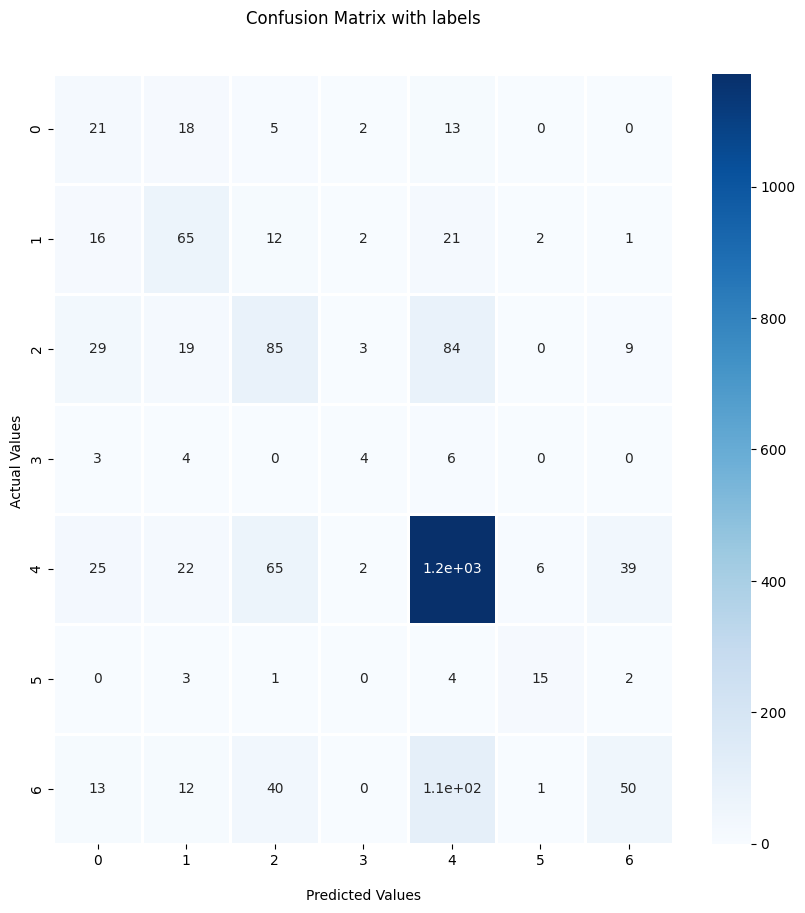

In [44]:

fig, ax = plt.subplots(figsize=(10,10))


ax = sns.heatmap(conf_mat, annot=True, cmap='Blues', linewidths=.9, ax=ax)

ax.set_title('Confusion Matrix with labels\n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])

ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])

plt.show()

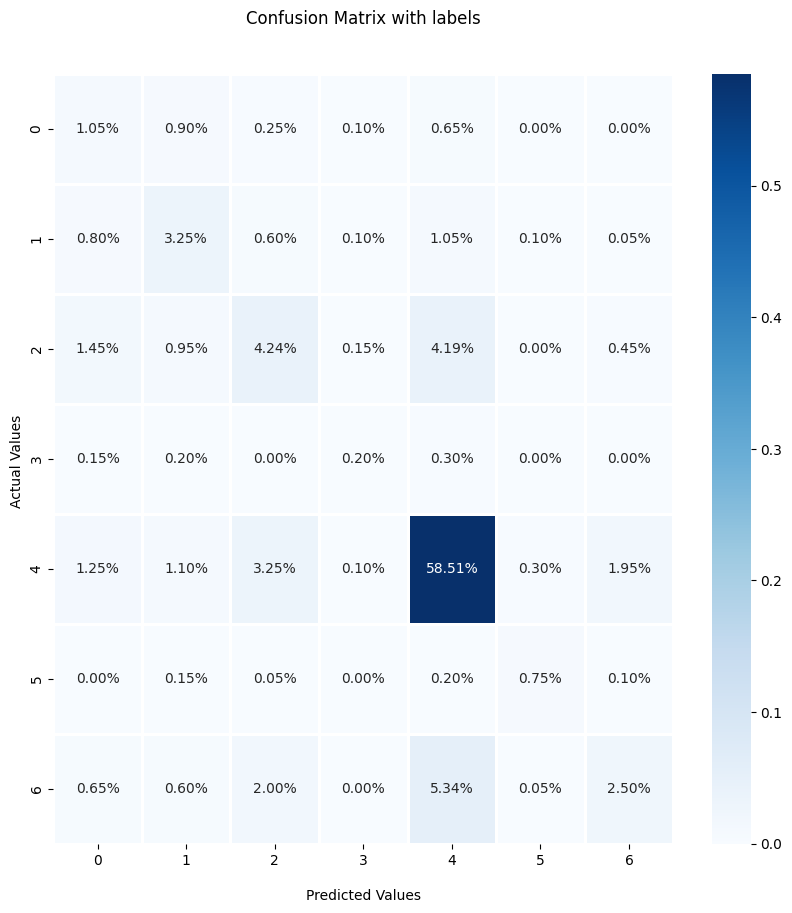

In [45]:

fig, ax = plt.subplots(figsize=(10,10))


ax = sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='.2%', cmap='Blues', linewidths=.9, ax=ax)

ax.set_title('Confusion Matrix with labels\n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])

ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])

plt.show()

In [46]:


import PIL

image=PIL.Image.open('/content/melanoma.jpg')

image=image.resize((28,28))

img=x_test[1]

img=np.array(image).reshape(-1,28,28,3)

result=model.predict(img)

print(result[0])

result=result.tolist()

max_prob=max(result[0])

class_ind=result[0].index(max_prob)

print(classes[class_ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 878ms/step
[1.9621808e-05 3.0688770e-05 1.4389746e-03 3.3508299e-05 9.7425526e-04
 6.1044309e-05 9.9744189e-01]
('mel', 'melanoma')
